In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [2]:
ames = pd.read_csv('./datasets/train_features.csv', na_values='NaN', keep_default_na=False, index_col=0)
ames_test = pd.read_csv('./datasets/test_features.csv', na_values='NaN', keep_default_na=False, index_col=0)

In [3]:
linreg = LinearRegression()

In [4]:
#Quickly tests NUMERICAL features, not dummies

def test_features(df, features, lr):
    X = df[features]
    y = df['SalePrice']
    
    # ----  Train Test Split and fit the train data, score the test data ----
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    lr.fit(X_train, y_train)
    
    print(f'TTS Train Score : {lr.score(X_train,y_train)}')
    print(f'TTS Test Score  : {lr.score(X_test,y_test)}')

   # ---- Get and print the RMSE for the train test split -----
    
    preds = lr.predict(X_test)
    
    rmse = metrics.mean_squared_error(y_test, preds, squared=False)
    
    print(f'TTS RMSE  : {rmse}')
    
    # ---- Print the scores from cross validation and the mean -----
    
    cv_score = cross_val_score(LinearRegression(), X, y)
    
    print(f'CrossVal Scores: {cv_score}')
    print(f'CrossVal Mean  : {cv_score.mean()}')
    
#Add a dataframe of dummies to append to X
    
def test_features_and_dummies(df, features, dummies, lr):
    X = df[features].join(dummies)
    y = df['SalePrice']
    
    # ----  Train Test Split and fit the train data, score the test data ----
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    lr.fit(X_train, y_train)
    
    print(f'TTS Train Score : {lr.score(X_train,y_train)}')
    print(f'TTS Test Score  : {lr.score(X_test,y_test)}')
    
    # ---- Get and print the RMSE for the train test split -----
    
    preds = lr.predict(X_test)
    
    rmse = metrics.mean_squared_error(y_test, preds, squared=False)
    
    print(f'TTS RMSE  : {rmse}')
    
    # ---- Print the scores from cross validation and the mean -----
    
    cv_score = cross_val_score(LinearRegression(), X, y)
    
    print(f'CrossVal Scores: {cv_score}')
    print(f'CrossVal Mean  : {cv_score.mean()}')

In [5]:
test_features(ames, ['SF Qual'], linreg)

TTS Train Score : 0.8531480900075835
TTS Test Score  : 0.881088829494126
TTS RMSE  : 28016.791869026016
CrossVal Scores: [0.84545539 0.87493984 0.86562303 0.85926404 0.85451708]
CrossVal Mean  : 0.8599598773836394


In [6]:
test_features(ames, ['SF Qual', 'Log Age', 'Porch SF'], linreg)

TTS Train Score : 0.8744041824101844
TTS Test Score  : 0.8623336649042838
TTS RMSE  : 29740.463432983976
CrossVal Scores: [0.86059609 0.88198998 0.87066416 0.87054326 0.8690651 ]
CrossVal Mean  : 0.8705717199866587


In [7]:
features = ['SF Qual', 'Log Age']

X_training = ames[features]
X_testing = ames_test[features]
y_training = ames['SalePrice']

linreg.fit(X_training, y_training)
test_predictions = linreg.predict(X_testing)
submission_df = pd.DataFrame({'SalePrice' : test_predictions}, index = ames_test['Id'])

In [8]:
submission_df.to_csv('./submissions/submissionX.csv')

In [9]:
pd.get_dummies(ames_test['Yr Sold'])

,2006,2007,2008,2009,2010
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
873,0,1,0,0,0
874,0,0,1,0,0
875,0,0,1,0,0
876,0,1,0,0,0


In [10]:
dummies = ['Neighborhood']
test_features_and_dummies(ames, features, pd.get_dummies(ames[['Neighborhood','Functional']], drop_first=True), linreg)

TTS Train Score : 0.8880376911212511
TTS Test Score  : 0.8798299863500489
TTS RMSE  : 29059.75924738149
CrossVal Scores: [0.87117389 0.89814657 0.89387044 0.86956494 0.87604842]
CrossVal Mean  : 0.8817608525858992


In [11]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# Create Dummy Dataframes

In [12]:
# First, organize lists of categorical column names

sale_category_cols = ['Yr Sold', 'Sale Type', 'MS SubClass', 'MS Zoning']
lot_category_cols =  ['Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Alley']
characteristics_category_cols = ['Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation']
rooms_category_cols = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',  'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces']
garage_category_cols = ['Garage Type', 'Garage Finish', 'Garage Cars']
features_category_cols = ['Fence', 'Misc Feature', 'Paved Drive']
condition_category_cols = ['Functional', 'Garage Cond', 'Condition 1', 'Condition 2', 'Bsmt Cond', 'Exter Cond']
qual_category_cols = ['Exter Qual', 'Bsmt Qual', 'Garage Qual', 'Fireplace Qu', 'Kitchen Qual', 'Heating QC', 'Pool QC']
bsmt_category_cols = ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
util_category_cols = ['Utilities', 'Heating', 'Central Air', 'Electrical']

all_dummies_list = (sale_category_cols + lot_category_cols + characteristics_category_cols + rooms_category_cols + garage_category_cols +
                    features_category_cols + condition_category_cols + qual_category_cols + bsmt_category_cols + util_category_cols + ['Neighborhood'])

# Then, create dataframes of dummies for each category

# These can easily be .join()-ed together or onto the X features dataframe

drop = False

sale_dummies = pd.get_dummies(ames[sale_category_cols].astype(str), drop_first=drop) #thanks to https://stackoverflow.com/questions/54569115/pandas-get-dummies-for-numeric-categorical-data for the help
lot_dummies = pd.get_dummies(ames[lot_category_cols], drop_first=drop)
characteristics_dummies = pd.get_dummies(ames[characteristics_category_cols], drop_first=drop)
rooms_dummies = pd.get_dummies(ames[rooms_category_cols].astype(str), drop_first=drop)
garage_dummies = pd.get_dummies(ames[garage_category_cols].astype(str), drop_first=drop)
features_dummies = pd.get_dummies(ames[features_category_cols], drop_first=drop)
condition_dummies = pd.get_dummies(ames[condition_category_cols], drop_first=drop)
qual_dummies = pd.get_dummies(ames[qual_category_cols], drop_first=drop)
bsmt_dummies = pd.get_dummies(ames[bsmt_category_cols], drop_first=drop)
util_dummies = pd.get_dummies(ames[util_category_cols], drop_first=drop)
neighbor_dummies = pd.get_dummies(ames['Neighborhood'], drop_first=drop)
function_dummies = pd.get_dummies(ames['Functional'], drop_first=drop)

all_dummies_no_drops = neighbor_dummies.join(sale_dummies).join(lot_dummies).join(characteristics_dummies).join(rooms_dummies).join(garage_dummies).join(features_dummies).join(condition_dummies).join(qual_dummies).join(bsmt_dummies).join(util_dummies)

drop = True

sale_dummies = pd.get_dummies(ames[sale_category_cols].astype(str), drop_first=drop) #thanks to https://stackoverflow.com/questions/54569115/pandas-get-dummies-for-numeric-categorical-data for the help
lot_dummies = pd.get_dummies(ames[lot_category_cols], drop_first=drop)
characteristics_dummies = pd.get_dummies(ames[characteristics_category_cols], drop_first=drop)
rooms_dummies = pd.get_dummies(ames[rooms_category_cols].astype(str), drop_first=drop)
garage_dummies = pd.get_dummies(ames[garage_category_cols].astype(str), drop_first=drop)
features_dummies = pd.get_dummies(ames[features_category_cols], drop_first=drop)
condition_dummies = pd.get_dummies(ames[condition_category_cols], drop_first=drop)
qual_dummies = pd.get_dummies(ames[qual_category_cols], drop_first=drop)
bsmt_dummies = pd.get_dummies(ames[bsmt_category_cols], drop_first=drop)
util_dummies = pd.get_dummies(ames[util_category_cols], drop_first=drop)
neighbor_dummies = pd.get_dummies(ames['Neighborhood'], drop_first=drop)
function_dummies = pd.get_dummies(ames['Functional'], drop_first=drop)

all_dummies = neighbor_dummies.join(sale_dummies).join(lot_dummies).join(characteristics_dummies).join(rooms_dummies).join(garage_dummies).join(features_dummies).join(condition_dummies).join(qual_dummies).join(bsmt_dummies).join(util_dummies)


In [13]:
features = ['SF Qual', 'Log Age', 'Porch SF', 'Overall Qual']

d_list = ['Sale Type',
                                 'Land Contour',
                                 'Bldg Type',
                                 'House Style',
                                 'Mas Vnr Type',
                                 'Garage Finish',
                                 'Exter Qual',
                                 'Bsmt Qual',
                                 'Kitchen Qual',
                                 'Garage Qual',
                                 'Fireplace Qu',
                                 'Heating QC',
                                 'BsmtFin Type 1', 
                                 'Neighborhood',
                                 'Functional']

dummies = pd.get_dummies(ames[d_list], drop_first=True)
test_dummies = pd.get_dummies(ames_test[d_list], drop_first=True)


test_features_and_dummies(ames, features, dummies, linreg)

TTS Train Score : 0.928864307532506
TTS Test Score  : 0.9041924660911621
TTS RMSE  : 23447.124151734195
CrossVal Scores: [0.89762527 0.93126345 0.92213009 0.90117935 0.91364984]
CrossVal Mean  : 0.9131696006229937


In [14]:
test_features_and_dummies(ames, features, all_dummies, linreg)

TTS Train Score : 0.9500510825096766
TTS Test Score  : 0.9038416723054402
TTS RMSE  : 25113.53441402189
CrossVal Scores: [0.89716827 0.91903023 0.91645391 0.88377906 0.92224239]
CrossVal Mean  : 0.9077347706687042


In [15]:
test_features_and_dummies(ames, features, [], linreg)

TTS Train Score : 0.880168129657703
TTS Test Score  : 0.8582908750068594
TTS RMSE  : 30686.28126534968
CrossVal Scores: [0.86107835 0.8867758  0.87192452 0.87196638 0.87456112]
CrossVal Mean  : 0.8732612330434171


# Making a prediction

In [16]:
X_training = ames[features].join(dummies)
X_testing = ames_test[features].join(pd.get_dummies(test_dummies, drop_first=True))
y_training = ames['SalePrice']

linreg.fit(X_training[X_testing.columns & X_training.columns], y_training) #Need to make sure that X matrices for fit and predicts have the same columns
test_predictions = linreg.predict(X_testing[X_training.columns & X_testing.columns])
submission_df = pd.DataFrame({'SalePrice' : test_predictions}, index = ames_test['Id'])

In [17]:
metrics.r2_score(linreg.predict(X_training[X_testing.columns & X_training.columns]), y_training)

0.9160096778511655

In [18]:
submission_df.to_csv('./submissions/submission.csv')

# Ridge

In [19]:
sc = StandardScaler()

In [20]:
Z_training = sc.fit_transform(X_training[X_testing.columns & X_training.columns])
Z_testing = sc.fit_transform(X_testing[X_testing.columns & X_training.columns])

ridge_cv = RidgeCV(alphas = np.logspace(0,5, num=300),
        scoring = 'r2',
        cv = 5).fit(Z_training, y_training)

predictions = ridge_cv.predict(Z_testing)

In [21]:
ridge_cv.alpha_

9.69665789314552

In [22]:
ridge_cv.score(Z_training, y_training)

0.9223416591365555

In [23]:
submission_df = pd.DataFrame({'SalePrice' : predictions}, index = ames_test['Id'])

In [24]:
submission_df.to_csv('./submissions/ridge_submission.csv')

# LASSO

In [25]:
from sklearn.linear_model import Lasso, LassoCV

In [26]:
# Code modified from lesson 4.02
lasso_cv = LassoCV(alphas = np.logspace(1,3, 1000), cv = 5)
lasso_cv.fit(Z_training, y_training);

In [27]:

lasso_cv.coef_

array([ 6.17268523e+04, -5.60797473e+03,  3.89116421e+03, -1.24379159e+04,
        9.36116860e+02,  2.11093852e+03,  3.83813236e+02,  0.00000000e+00,
        2.62925726e+01,  3.89253568e+03,  1.11830974e+03,  2.63231090e+03,
        1.74433085e+03,  1.33980521e+03, -1.14351860e+02, -7.04960732e+02,
       -3.03160154e+03, -2.58212582e+03, -4.01667757e+03,  0.00000000e+00,
       -1.64267533e+03, -1.69758450e+02,  3.80501838e+02,  2.29415501e+03,
        1.12026966e+03,  8.40488001e+02, -0.00000000e+00,  2.64422721e+01,
        8.53576517e+02,  1.33664852e+02, -1.72737847e+03, -1.48398735e+03,
       -2.75163283e+03, -6.80432060e+03, -7.42187455e+03, -2.33300749e+03,
       -6.54113822e+03, -3.96352722e+02, -1.65589216e+02, -6.80964990e+03,
       -4.62001385e+03, -8.76730238e+03, -1.16199520e+04,  1.44504904e+03,
        6.88162717e-02, -5.40337145e+02,  2.24772772e+02, -0.00000000e+00,
        5.95089799e+02, -2.13948172e+03, -4.64141365e+01,  1.14771469e+03,
       -1.63336090e+03, -

In [28]:
lasso_cv.score(Z_training, y_training)

0.9218350620398744

In [29]:
lasso_cv.alpha_

103.51779556301763

In [30]:
lasso_preds = lasso_cv.predict(Z_testing)

In [31]:
submission_df = pd.DataFrame({'SalePrice' : lasso_preds}, index = ames_test['Id'])

In [32]:
submission_df.to_csv('./submissions/lasso_submission.csv')

### Results of regularization

Regularization did not improve predictions on the test data. The linear models have good train/test split and cross-validation scores. There is little room for improvement between bias and variance, so any effect of regularization may be outweighted by random error.

# Final Iterations

Here, I makea basic model that only uses a few continuous (ish) features and no categorical data. Then, I create a new column to analyze the error in those predictions.

In [33]:
X_training = ames[features]
# X_testing = ames_test[features]
y_training = ames['SalePrice']

linreg.fit(X_training, y_training)

LinearRegression()

In [34]:
#The X matrix to model with is all categorical dummies - but no dropped values.

X = all_dummies_no_drops

In [35]:

smols = sm.OLS(ames['SalePrice'], sm.add_constant(X) ).fit()

In [36]:
smols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     66.17
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:22:46   Log-Likelihood:                -23529.
No. Observations:                2047   AIC:                         4.760e+04
Df Residuals:                    1774   BIC:                         4.914e+04
Df Model:                         272                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.612e+04   2647.042      6.088      0.000    1.09e+04    2.13e+04
Blmngtn              -1.604e+04   6716.743     -2.389      0.017   -2.92e+04   -2871.162
Blueste               -903.4457   1.14e+04     -0.079      0.937   -2.34e+04    2.15e+04
BrDale                3493.5959   8267.669      0.423      0.673   -1.27e+04    1.97e+04
BrkSide              -1.093e+04   4861.937     -2.247      0.025   -2.05e+04   -1391.081
ClearCr              -2663.9764   6301.447     -0.423      0.673    -1.5e+04    9695.066
CollgCr              -1.041e+04   3141.854     -3.312      0.001   -1.66e+04   -4245.180
Crawfor               3160.9965   4228.405      0.748      0.455   -5132.183    1.15e+04
Edwards              -1.871e+04   3338.455     -5.605      0.000   -2.53e+04   -1.22e+04
Gilbert              -1.812e+04   3658.987     -4.953      0.000   -2.53e+04   -1.09e+04
Greens                1.072e+04    1.6e+04      0.672      0.502   -2.06e+04     4.2e+04
GrnHill               1.153e+05   1.88e+04      6.142      0.000    7.85e+04    1.52e+05
IDOTRR               -1.296e+04   6004.477     -2.158      0.031   -2.47e+04   -1178.753
Landmrk              -1.935e+04   2.68e+04     -0.723      0.470   -7.19e+04    3.32e+04
MeadowV              -1.564e+04   8033.170     -1.947      0.052   -3.14e+04     115.450
Mitchel              -1.101e+04   3745.157     -2.941      0.003   -1.84e+04   -3669.129
NAmes                -1.414e+04   2988.708     -4.730      0.000      -2e+04   -8274.339
NPkVill                901.9467   1.53e+04      0.059      0.953   -2.91e+04     3.1e+04
NWAmes               -1.046e+04   3845.402     -2.719      0.007    -1.8e+04   -2915.208
NoRidge               3.431e+04   4932.492      6.955      0.000    2.46e+04     4.4e+04
NridgHt               2.406e+04   3921.584      6.135      0.000    1.64e+04    3.18e+04
OldTown              -1.739e+04   4684.833     -3.712      0.000   -2.66e+04   -8203.118
SWISU                -1.893e+04   5855.391     -3.233      0.001   -3.04e+04   -7446.326
Sawyer               -1.321e+04   3558.205     -3.714      0.000   -2.02e+04   -6235.908
SawyerW              -1.128e+04   3666.671     -3.077      0.002   -1.85e+04   -4089.635
Somerst               7737.8121   5662.367      1.367      0.172   -3367.801    1.88e+04
StoneBr               3.807e+04   5366.320      7.094      0.000    2.75e+04    4.86e+04
Timber               -1.058e+04   4525.645     -2.337      0.020   -1.95e+04   -1700.972
Veenker               1.113e+04   7331.245      1.518      0.129   -3252.964    2.55e+04
Yr Sold_2006          4295.0519   1327.718      3.235      0.001    1690.996    6899.108
Yr Sold_2007          2458.8334   1276.150      1.927      0.054     -44.082    4961.749
Yr Sold_2008          3322.5114   1304.852      2.546    

In [37]:
sorted_pvalues = smols.pvalues.sort_values()

In [38]:
coeffs = pd.DataFrame(smols.params, columns = ['coeff']).join(pd.DataFrame(smols.pvalues, columns = ['pval']))
coeffs[coeffs['pval'] < 0.05].sort_values(by = 'coeff').tail(40)

,coeff,pval
const,16115.677058,1.396481e-09
Heating_GasW,16203.881341,3.194412e-02
Garage Cars_3.0,16999.828596,4.050967e-03
Exterior 2nd_VinylSd,17384.764086,3.654863e-02
Half Bath_1,17979.704463,1.108818e-08
TotRms AbvGrd_10,18496.739730,1.357954e-03
Fireplace Qu_Ex,19124.803115,1.901919e-05
Functional_Typ,21009.949130,2.029235e-05
Bsmt Qual_Ex,21989.783406,9.915655e-04
Fireplaces_2,22222.574534,4.591134e-02


In [39]:
# After Trying Different p-values, I will pick 0.5 and try to regularize it to a better fit

In [40]:
cat_feature_list = []

for column, pval in (sorted_pvalues.items()):
    if pval < 0.5:
        cat_feature_list.append(column)

In [41]:
cat_feature_list.remove('const')
all_dummies_no_drops[cat_feature_list]

,Kitchen Qual_Ex,Bsmt Exposure_Gd,Exter Qual_Ex,StoneBr,NoRidge,TotRms AbvGrd_11,Full Bath_3,GrnHill,NridgHt,Half Bath_1,...,BsmtFin Type 1_NA,Bsmt Exposure_NA,Bsmt Cond_NA,Exterior 2nd_Brk Cmn,Fireplace Qu_Po,Sale Type_WD,BsmtFin Type 1_Unf,Sale Type_CWD,MS Zoning_A (agr),Bsmt Full Bath_3.0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
test_features_and_dummies(ames, features, all_dummies_no_drops[cat_feature_list], linreg)

TTS Train Score : 0.9445999196582463
TTS Test Score  : 0.9245892512156615
TTS RMSE  : 22325.216967460878
CrossVal Scores: [0.90430115 0.9242732  0.92255371 0.89330751 0.92667181]
CrossVal Mean  : 0.9142214758818688


In [43]:
final_sm = sm.OLS(ames['SalePrice'], sm.add_constant(ames[features].join(all_dummies_no_drops))).fit()

In [44]:
final_X_dummies = pd.get_dummies(ames_test[all_dummies_list].astype(str))

final_X_dummies = final_X_dummies[final_X_dummies.columns & cat_feature_list] #Need to make sure that X matrices for fit and predicts have the same columns

final_X_testing = sm.add_constant(ames_test[features].join(final_X_dummies))

final_X_training = sm.add_constant(X_training.join(all_dummies_no_drops[final_X_dummies.columns & cat_feature_list]))

final_sm = sm.OLS(y_training, final_X_training).fit()

final_preds = final_sm.predict(final_X_testing)

In [45]:
final_X_training.shape

(2047, 194)

In [46]:
submission_df = pd.DataFrame(zip(ames_test['Id'], final_preds), columns = ['Id', 'SalePrice']).set_index('Id')
submission_df.to_csv('./submissions/final_submission.csv')

## Regularization

With the final model (picking some features with high p-values), try regularizing the data:

Comparing the lasso and ridge models and selecting one to be the final model.

### Lasso

In [47]:
final_Z_training = sc.fit_transform(final_X_training)
final_Z_testing = sc.transform(final_X_testing)

In [48]:
lasso_cv = LassoCV(alphas = np.logspace(1,3, 1000), cv = 5)
lasso_cv.fit(final_Z_training, y_training);

In [49]:
lasso_cv.score(final_Z_training, y_training)

0.9306498908121483

In [50]:
lasso_training_preds = lasso_cv.predict(final_Z_training)

In [51]:
metrics.mean_squared_error(y_training, lasso_training_preds, squared=False)

20877.926057402852

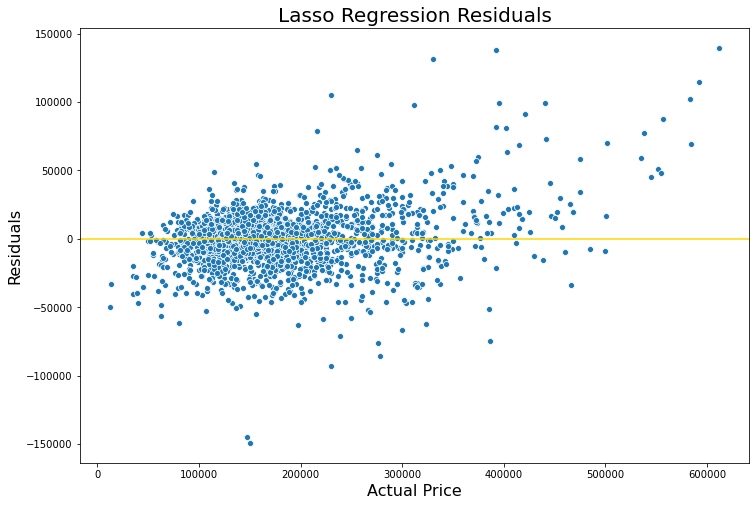

In [68]:
plt.figure(figsize = (12,8))
sns.scatterplot(ames['SalePrice'], y_training - lasso_training_preds)
plt.axhline(c='gold')

plt.xlabel('Actual Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Lasso Regression Residuals', fontsize = 20);

### Ridge

In [53]:
ridge_cv = RidgeCV(alphas = np.logspace(0,5, num=300),
        scoring = 'r2',
        cv = 5).fit(final_Z_training, y_training)

In [54]:
ridge_cv.score(final_Z_training, y_training)

0.9322539980260225

In [55]:
ridge_training_preds = ridge_cv.predict(final_Z_training)

In [56]:
metrics.mean_squared_error(y_training, ridge_training_preds, squared=False)

20635.054286694427

In [57]:
ridge_final_predictions = ridge_cv.predict(final_Z_testing)

In [58]:
submission_df = pd.DataFrame({'SalePrice' : ridge_final_predictions}, index = ames_test['Id'])
submission_df.to_csv('./submissions/final_ridge.csv')

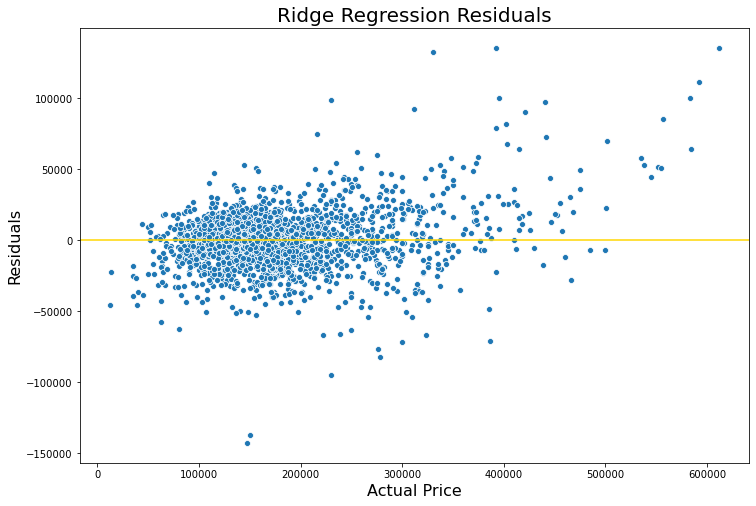

In [66]:
plt.figure(figsize = (12,8))
sns.scatterplot(ames['SalePrice'], y_training - ridge_training_preds)
plt.axhline(c='gold')

plt.xlabel('Actual Price', fontsize = 16)
plt.ylabel('Residuals', fontsize = 16)
plt.title('Ridge Regression Residuals', fontsize = 20);

Text(0.5, 1.0, 'Ridge Residuals Histogram')

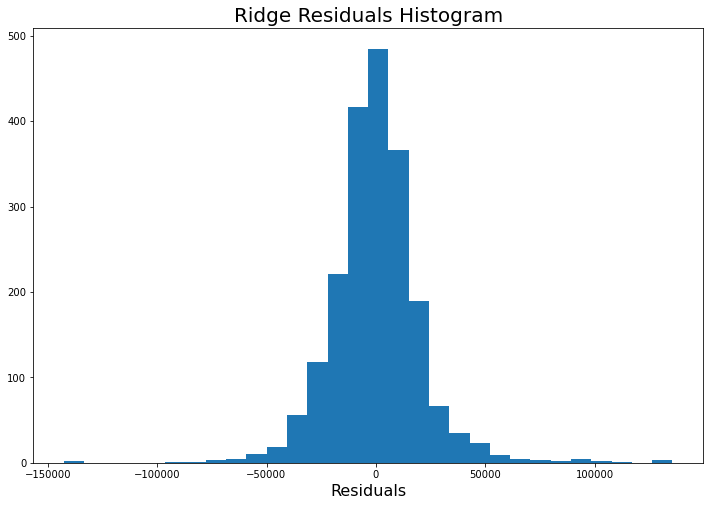

In [69]:
plt.figure(figsize=(12,8))

plt.hist(y_training - ridge_training_preds, bins = 30);

plt.xlabel('Residuals', fontsize = 16)
plt.title('Ridge Residuals Histogram', fontsize = 20)


### Save Large Dataframes

In [61]:
#For Visualizations

In [62]:
ames_train_large = ames.join(all_dummies_no_drops)

linreg.fit(ames[['Total SF']], ames['SalePrice'])
Total_SF_Preds = linreg.predict(ames[['Total SF']])

ames_train_large['SF Preds'] = Total_SF_Preds
ames_train_large['Ridge Preds'] = ridge_training_preds

In [63]:
ames_train_large.to_csv('./datasets/train_with_dummies.csv')